<a href="https://colab.research.google.com/github/brianreinke95/TP_Grupo0_Ciencia_Datos/blob/main/EDA_espaciosv_verdes_y_comunas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA espacios Verdes y Comunas

El objetivo principal poder medir y analizar la cantidad y tipo de espacios verdes en la ciudad de buenos aires y a su vez poder compararlos con los que recoiendan organizaciones como la OMS en terminos de M2 (metros cuadrados) de espacios verdes por habitante. Teniendo en cuenta que C.A.B.A. es una de las grandes urbes a nivel mundial.

## Primero se debe instalar geopandas y geoplot

In [1]:

!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-yj9gu0v2
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-yj9gu0v2
     |████████████████████████████████| 14.8MB 340kB/s 
     |████████████████████████████████| 6.5MB 39.5MB/s 
  Created wheel for geopandas: filename=geopandas-0.8.0+61.gaa68766-py2.py3-none-any.whl size=970787 sha256=9d3d191fcc387f243fcf48bda9d582f78e05a14ba82b158da9d4f9ba013d3df2
  Stored in directory: /tmp/pip-ephem-wheel-cache-2dolau81/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
G

### Se importan bobliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
%matplotlib inline

#Carga de datasets

Los datasets a utilizar se pueden encontrar en las siguentes paguinas: 

https://data.buenosaires.gob.ar/dataset/espacios-verdes

https://data.buenosaires.gob.ar/dataset/comunas

El de espacios verdes se descarga tanto con pandas para poder manipularlo como con geopandas para las visualizaciones de los mapas. El de comunas solo con geopandas

In [4]:
evt = pd.read_csv("espacios_verdes.csv")

In [5]:
np.shape(evt)

(1736, 37)

In [6]:
evt.head(10)

,WKT,nombre,nombre_ev,clasificac,patio_de_j,apadrinada,observacio,fuente_geo,fuente_ins,ubicacion,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,barrio,comuna,fech_padri,vig_padri,alc_conven,nom_mapa,id_ev_pub,area,perimeter,DGEV_padri,mant_2017,tareas,estado,sup_total,canil,posta_aero,etiqueta,reja,horario_invierno,horario_verano,obs_reja
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,Escuela Scalabrini Ortiz,ESCUELA Nº 13 D.E. 09 SCALABRINI ORTIZ,PLAZOLETA,NO,NaN,Redigitalización en Agosto de 2017. Unión de s...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",NaN,NaN,NaN,NaN,NaN,NaN,COLEGIALES,13.0,NaN,NaN,NaN,Esc. Scalabrini Ortiz,2,1658.266,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,NaN,SIN NOMBRE,PLAZOLETA,NO,NaN,ESPACIOS VERDES,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",NaN,NaN,NaN,NaN,NaN,NaN,COLEGIALES,13.0,NaN,NaN,NaN,NaN,5,3.984,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MULTIPOLYGON (((-58.4448074253007 -34.57987067...,Polideportivo Colegiales,POLIDEPORTIVO COLEGIALES,PARQUE,NO,NaN,Redigitalización por USIG en Agosto de 2017. U...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",NaN,NaN,NaN,NaN,NaN,NaN,COLEGIALES,13.0,NaN,NaN,NaN,Polidep. Colegiales,6,4686.060,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NO,NaN,NaN,NaN,NaN
3,MULTIPOLYGON (((-58.4382360541145 -34.54616199...,NaN,SIN NOMBRE,PLAZOLETA,NO,NaN,ESPACIOS VERDES,USIG,USIG,"GUIRALDES, INTENDENTE - ESTACIONAMIENTO - PARQ...",NaN,NaN,NaN,NaN,NaN,NaN,BELGRANO,13.0,NaN,NaN,NaN,NaN,8,3746.965,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MULTIPOLYGON (((-58.4552876770316 -34.56223232...,Plaza Rafael Hernández,"HERNANDEZ, RAFAEL",PLAZA,SI,NO,NaN,ESPACIOS VERDES,E.V.,"ECHEVERRIA - VUELTA DE OBLIGADO - MOM, POLICARPO",7.918,1975,32.256,1975,15.173,1975,BELGRANO,13.0,NaN,NaN,NaN,Pza. Rafael Hernández,9,558.986,9990.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MULTIPOLYGON (((-58.4371387094279 -34.55314301...,Plaza Pques. Nacionales Argentinos,PARQUES NACIONALES ARGENTINOS,PLAZA,NO,NO,NaN,ESPACIOS VERDES,E.V.,"ECHEVERRIA - CASTAÑEDA - SUCRE, ANTONIO J. DE,...",NaN,NaN,26.838,10/07/1972,14.339,20/07/1972,BELGRANO,13.0,NaN,NaN,NaN,Pza. Pques. Nacionales Argentinos,10,12169.958,1000.0,SI,SI,Parquización - Veredas perimetrales,Finalizada,10215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MULTIPOLYGON (((-58.4152722430777 -34.57528566...,NaN,SIN NOMBRE,PLAZOLETA,NO,NaN,ESPACIOS VERDES,USIG,USIG,"DEL LIBERTADOR, AV. - SARMIENTO, AV. (FRENTE M...",NaN,NaN,NaN,NaN,NaN,NaN,PALERMO,14.0,NaN,NaN,NaN,NaN,11,28.385,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MULTIPOLYGON (((-58.4154190362523 -34.57532620...,NaN,SIN NOMBRE,PLAZOLETA,NO,NaN,ESPACIOS VERDES,USIG,USIG,"DEL LIBERTADOR, AV. - SARMIENTO, AV. (FRENTE M...",NaN,NaN,NaN,NaN,NaN,NaN,PALERMO,14.0,NaN,NaN,NaN,NaN,12,47.483,9997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MULTIPOLYGON (((-58.4148132195299 -34.57459689...,República de Montenegro,REPUBLICA DE MONTENEGRO,PLAZOLETA,NO,NaN,ESPACIOS VERDES - Asignación de nombre según L...,USIG,USIG,"DEL LIBERTADOR, AV. - SARMIENTO, AV. (FRENTE M...",DECRETO N.° 323/16,27/05/2016,LEY N.° 5527,05/05/2016,4894,01/06/2016,PALERMO,14.0,NaN,NaN,NaN,Plzta. Rep. de Montenegro,13,164.612,9990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MULTIPOLYGON (((-58.4741362225437 -34.54943439...,Ing. G. Ave Lallemant,"AVE LALLEMANT, GERMAN, Ing.",CANTERO CENTRAL,SI,NaN,ESPACIOS VERDES,USIG,USIG,"GARCIA DEL RIO, AV. E/ VIDAL Y CRAMER",396,24/04/1996,50.116,30/11/1995,20.284,09/05/1996,SAAVEDRA,12.0,NaN,NaN,NaN,Ing. G. Ave Lallemant,15,1948.256,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
evt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WKT               1736 non-null   object 
 1   nombre            937 non-null    object 
 2   nombre_ev         1428 non-null   object 
 3   clasificac        1736 non-null   object 
 4   patio_de_j        1567 non-null   object 
 5   apadrinada        718 non-null    object 
 6   observacio        1150 non-null   object 
 7   fuente_geo        1697 non-null   object 
 8   fuente_ins        1683 non-null   object 
 9   ubicacion         1636 non-null   object 
 10  decreto           493 non-null    object 
 11  fecha_decr        531 non-null    object 
 12  ordenanza_        702 non-null    object 
 13  fecha_orde        738 non-null    object 
 14  boletin_of        768 non-null    object 
 15  fecha_bole        767 non-null    object 
 16  barrio            1730 non-null   object 


In [8]:
print(evt.isnull().sum())

WKT                    0
nombre               799
nombre_ev            308
clasificac             0
patio_de_j           169
apadrinada          1018
observacio           586
fuente_geo            39
fuente_ins            53
ubicacion            100
decreto             1243
fecha_decr          1205
ordenanza_          1034
fecha_orde           998
boletin_of           968
fecha_bole           969
barrio                 6
comuna                 0
fech_padri          1667
vig_padri           1668
alc_conven          1669
nom_mapa             801
id_ev_pub              0
area                   0
perimeter              0
DGEV_padri          1654
mant_2017           1653
tareas              1653
estado              1653
sup_total            994
canil               1542
posta_aero          1567
etiqueta            1728
reja                1723
horario_invierno    1723
horario_verano      1723
obs_reja            1731
dtype: int64


Podemos notar que muchas de las columnas tienen una gran cantidad de nulos y no aportan informacion relevante

In [9]:
ev = gpd.read_file("espacios_verdes.csv")
np.shape(ev)

(1736, 38)

In [10]:
ev.head(2)

,WKT,nombre,nombre_ev,clasificac,patio_de_j,apadrinada,observacio,fuente_geo,fuente_ins,ubicacion,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,barrio,comuna,fech_padri,vig_padri,alc_conven,nom_mapa,id_ev_pub,area,perimeter,DGEV_padri,mant_2017,tareas,estado,sup_total,canil,posta_aero,etiqueta,reja,horario_invierno,horario_verano,obs_reja,geometry
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,Escuela Scalabrini Ortiz,ESCUELA Nº 13 D.E. 09 SCALABRINI ORTIZ,PLAZOLETA,NO,,Redigitalización en Agosto de 2017. Unión de s...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,Esc. Scalabrini Ortiz,2,1658.266,0.0,,,,,0.0,,,,,,,,"MULTIPOLYGON (((-58.44536 -34.57925, -58.44489..."
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,,SIN NOMBRE,PLAZOLETA,NO,,ESPACIOS VERDES,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,,5,3.984,0.0,,,,,0.0,,,,,,,,"MULTIPOLYGON (((-58.44481 -34.57991, -58.44482..."


In [11]:
com = gpd.read_file("comunasg.csv")
np.shape(com)

(15, 8)

In [12]:
com.head(3)

,wkt,barrios,perimetro,area,comunas,id,objeto,geometry
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."


#Limpieza

Cambiamos los nombres de algunas columnas del dataset de comunas por las siguientes razones:
- La columna "comunas" se cambia por "comuna", para que tenga el mismo nombre que en el dataset de espacios verdes.
- La columna  "area" se cambia por "areac" ya que este es el area de la comuna y no se debe confundir con el dataset de espacios verdes ya que en ese caso "area" indica el area de los espacios verdes.

In [13]:
com = com.rename(columns = {'comunas': 'comuna', "area":"areac"}, inplace = False)
com.head(3)

,wkt,barrios,perimetro,areac,comuna,id,objeto,geometry
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."


### Se depuran las columnas con nulos o irrelevantes

Se procede eliminando las columnas con muchos nulos o que no aportan informacion relevante

In [14]:
evt = evt.drop(["nombre_ev", "apadrinada", "observacio", "fuente_geo", "fuente_ins", "decreto", "fecha_decr", "ordenanza_", "fecha_orde", "boletin_of", "fecha_bole", "fech_padri", "vig_padri", "alc_conven", "nom_mapa", "DGEV_padri", "mant_2017", "tareas", "estado", "sup_total", "canil", "posta_aero", "etiqueta", "reja", "horario_invierno", "horario_verano", "obs_reja"], axis = 1)

In [15]:
evt.head(3)

,WKT,nombre,clasificac,patio_de_j,ubicacion,barrio,comuna,id_ev_pub,area,perimeter
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,Escuela Scalabrini Ortiz,PLAZOLETA,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,2,1658.266,0.0
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,NaN,PLAZOLETA,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,5,3.984,0.0
2,MULTIPOLYGON (((-58.4448074253007 -34.57987067...,Polideportivo Colegiales,PARQUE,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,6,4686.060,0.0


In [16]:
com.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wkt        15 non-null     object  
 1   barrios    15 non-null     object  
 2   perimetro  15 non-null     object  
 3   areac      15 non-null     object  
 4   comuna     15 non-null     object  
 5   id         15 non-null     object  
 6   objeto     15 non-null     object  
 7   geometry   15 non-null     geometry
dtypes: geometry(1), object(7)
memory usage: 1.1+ KB


En el caso de este datasets son pocas las features y todas utiles

Se cambia el formato de la columna comunas a string

In [17]:
com["comuna"] = com["comuna"].astype("str")
com.head()

,wkt,barrios,perimetro,areac,comuna,id,objeto,geometry
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."
3,MULTIPOLYGON (((-58.4519952454565 -34.62974544...,FLORES - PARQUE CHACABUCO,17972.2578696,12422900.8308,7,4,LIMITE COMUNAL,"MULTIPOLYGON (((-58.45200 -34.62975, -58.45158..."
4,MULTIPOLYGON (((-58.5192540532325 -34.63301009...,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,16505305.7861,9,5,LIMITE COMUNAL,"MULTIPOLYGON (((-58.51925 -34.63301, -58.51908..."


#Análisis

Muestro todas las clasificaciones que hay para espacios_verdes

In [18]:
ev["clasificac"].unique()

array(['PLAZOLETA', 'PARQUE', 'PLAZA', 'CANTERO CENTRAL', 'JARDÍN',
       'PATIO RECREATIVO', 'PARQUE SEMIPÚBLICO', 'PASEO',
       'BARRIO/COMPLEJO', 'PATIO DE JUEGOS INCLUSIVO', 'JARDÍN BOTÁNICO',
       'PATIO'], dtype=object)

In [19]:
evtxt= evt.groupby(["clasificac"]).area.sum()
evtxt

clasificac
BARRIO/COMPLEJO               124739.144
CANTERO CENTRAL              1112466.599
JARDÍN                        294967.606
JARDÍN BOTÁNICO                49868.072
PARQUE                       7015027.959
PARQUE SEMIPÚBLICO           3337706.205
PASEO                           1059.347
PATIO                           1515.590
PATIO DE JUEGOS INCLUSIVO       1312.427
PATIO RECREATIVO               14525.283
PLAZA                        2502148.914
PLAZOLETA                    1824483.321
Name: area, dtype: float64

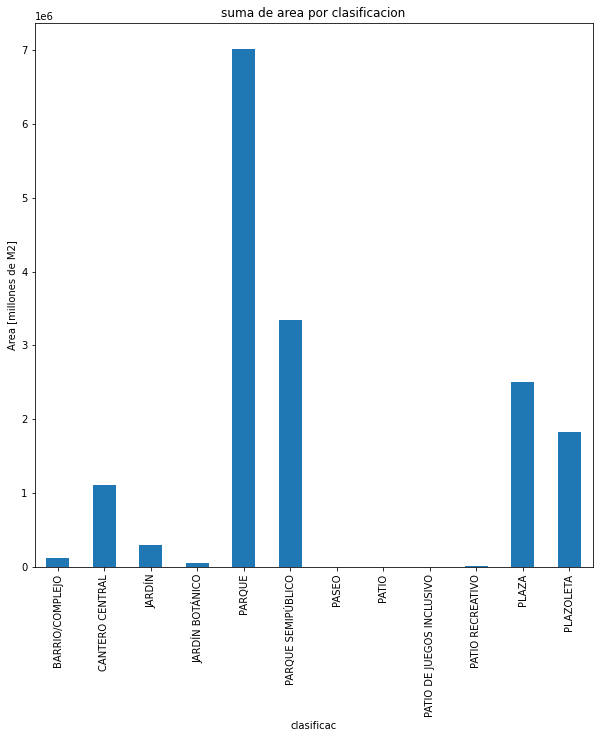

In [20]:
evtxt.plot(kind = "bar", figsize = (10,10), ylabel = "Area [millones de M2]", title ="suma de area por clasificacion")

In [21]:
evtxc= evt.groupby(["comuna"]).area.sum()
evtxc

comuna
0.0       19003.432
1.0     3242112.835
2.0      336135.186
3.0       45904.233
4.0      614307.522
5.0       20884.801
6.0      215695.441
7.0      342438.339
8.0     4168891.548
9.0      717913.744
10.0    1247864.288
11.0     118195.611
12.0    1014328.639
13.0    1746754.667
14.0    2220344.164
15.0     209046.017
Name: area, dtype: float64

Se genera un grafico de barras para conocer cuantos M2 de espacios verde tiene cada comuna

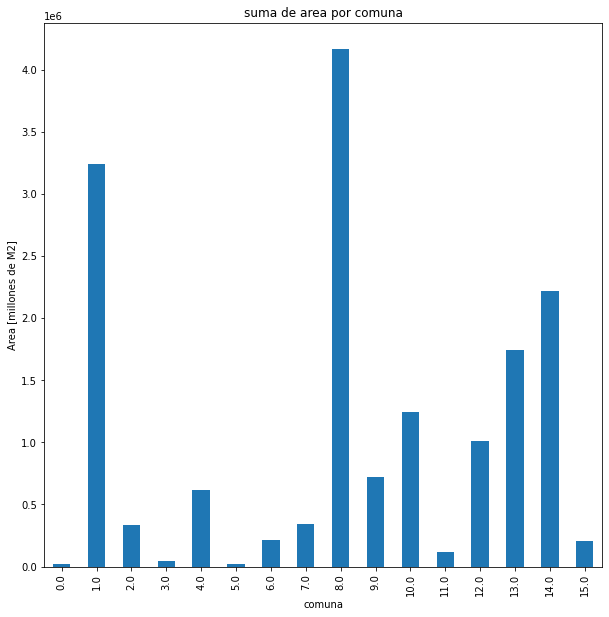

In [22]:
evt.groupby(["comuna"]).area.sum().plot(kind="bar", figsize = (10,10), ylabel = "Area [millones de M2]", title ="suma de area por comuna")

que hay en la comuna cero?

In [23]:
comuna0 = evt["comuna"] == 0
comuna0

0       False
1       False
2       False
3       False
4       False
        ...  
1731    False
1732    False
1733    False
1734    False
1735    False
Name: comuna, Length: 1736, dtype: bool

In [24]:
comuna0 = evt[comuna0]


Se modifican los valores de la comuna por los que realmente son

In [25]:
evt.loc[1497, 'comuna'] = 10.0
evt.loc[1570, 'comuna'] = 8.0
evt.loc[1571, 'comuna'] = 8.0
evt.loc[1573, 'comuna'] = 8.0
evt.loc[1574, 'comuna'] = 8.0
evt.loc[1727, 'comuna'] = 1.0
comuna0 = evt["comuna"] == 0
comuna0 = evt[comuna0]
comuna0

,WKT,nombre,clasificac,patio_de_j,ubicacion,barrio,comuna,id_ev_pub,area,perimeter


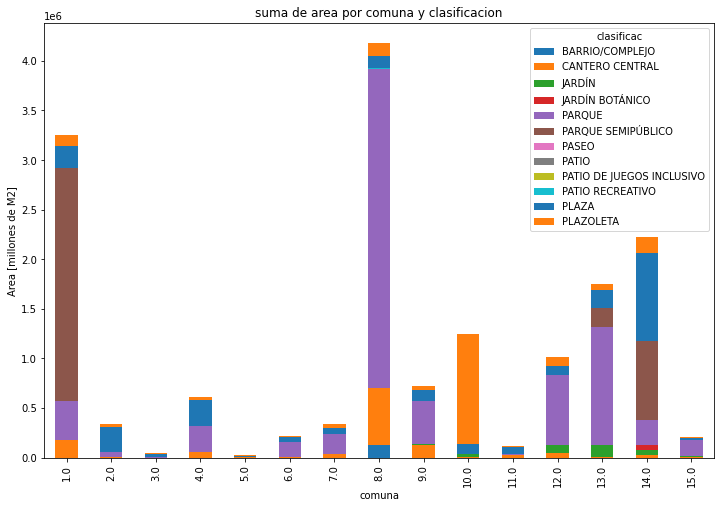

In [69]:
sub_evt = evt.groupby(["comuna","clasificac"])["area"].sum().unstack()
sub_evt.plot(kind="bar",stacked=True, label = True, figsize = (12,8), ylabel = "Area [millones de M2]", title ="suma de area por comuna y clasificacion")

Se generan Boxplot por cada clasificacion de Espacios verdes y por comuna

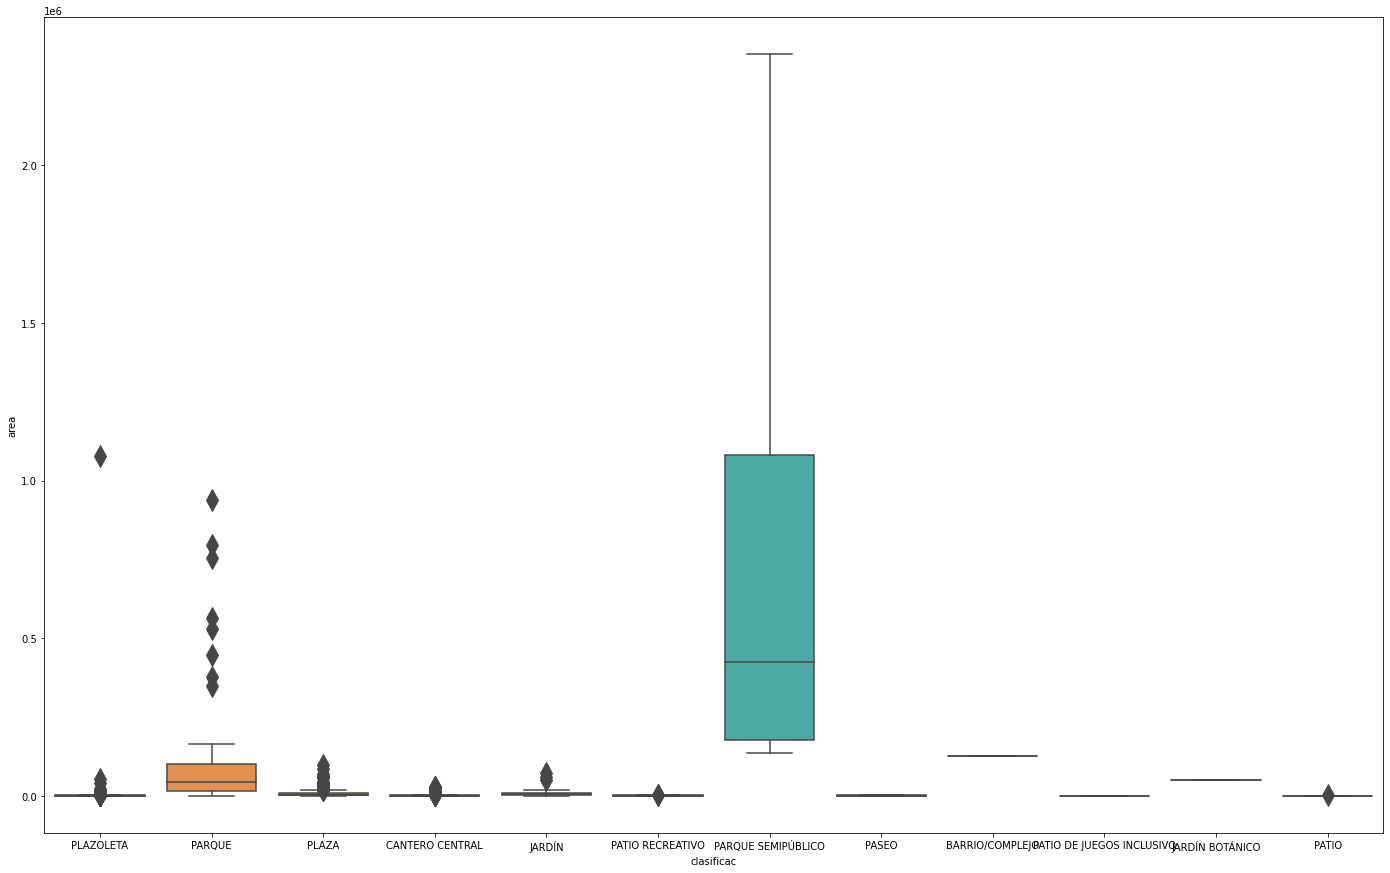

In [26]:
plt.figure(figsize=(24,15))
ax = sns.boxplot(x="clasificac", y="area", data=evt, fliersize = 15)

Se realiza el mismo grafico exceptuando el parque semipublico ya que tiene parametros muy lejanos a la media (una especie de outlier) y eso dificulta la visualizacion de las demas clasificaciones

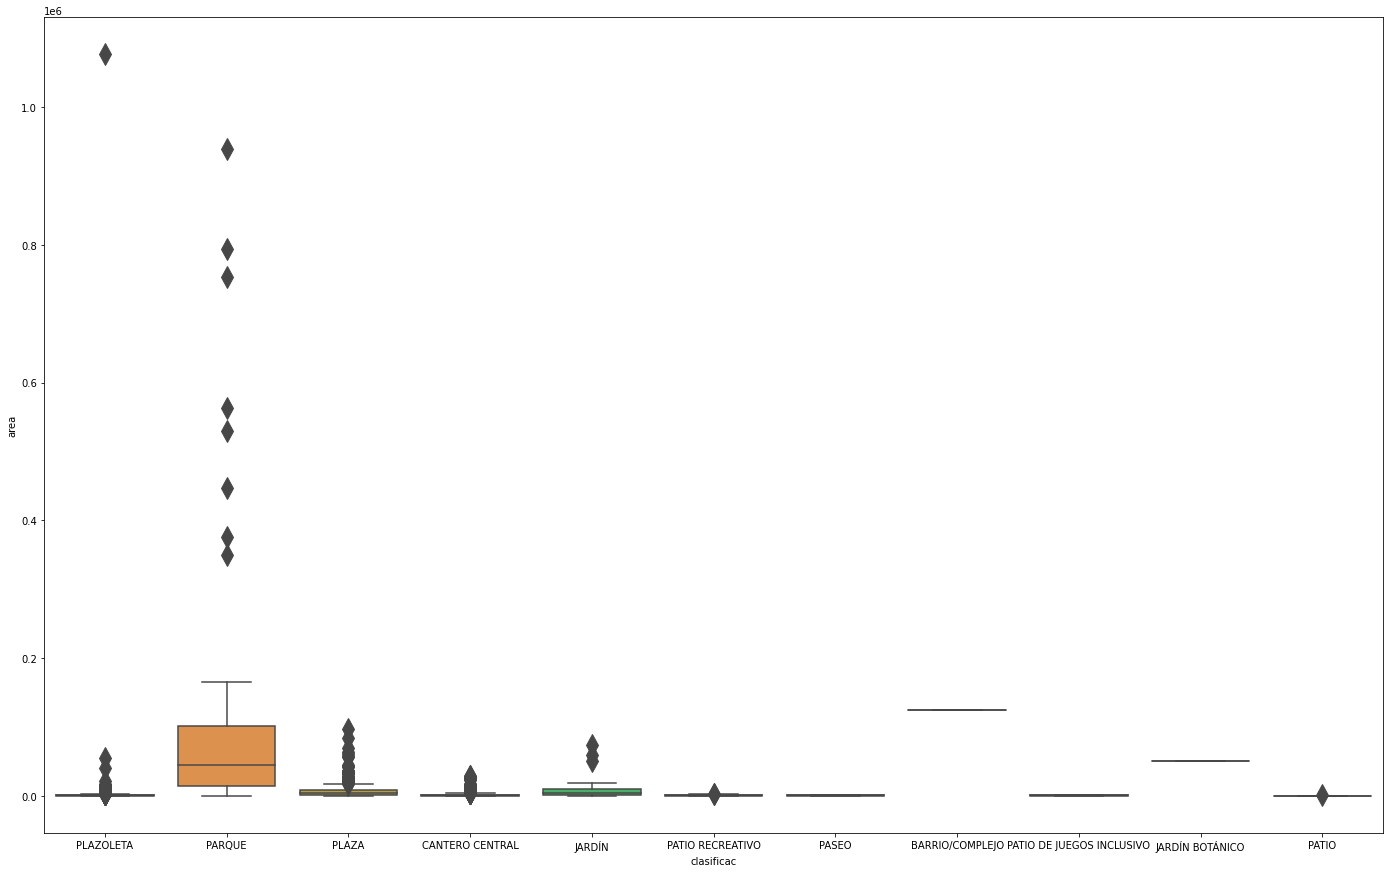

In [60]:
evtsps = evt[evt['clasificac'] != "PARQUE SEMIPÚBLICO"]
plt.figure(figsize=(24,15))
ax = sns.boxplot(x="clasificac", y="area", data=evtsps, fliersize = 15)

Se puede notar facilmente que ademas de "parque semipubluco" las clasificaciones de mayor cantidad de metros cuadrados son los parques, jardines y plazas.

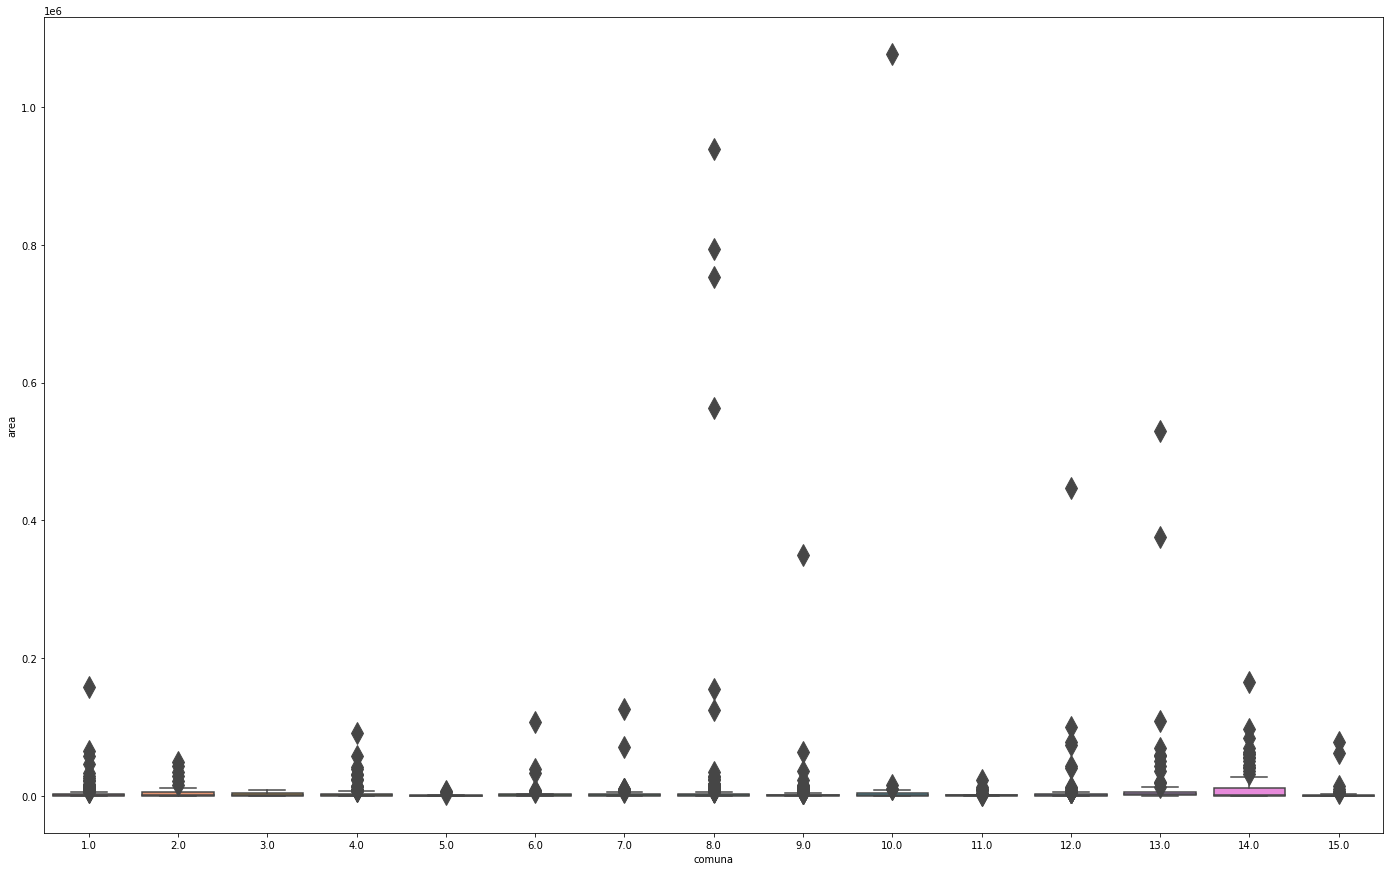

In [61]:
plt.figure(figsize=(24,15))
ax = sns.boxplot(x="comuna", y="area", data=evtsps, fliersize = 15)

Tambien mostramos un Pairplot clasificado por tipo de Espacio Verde para entender mejora las relaciones de las variables

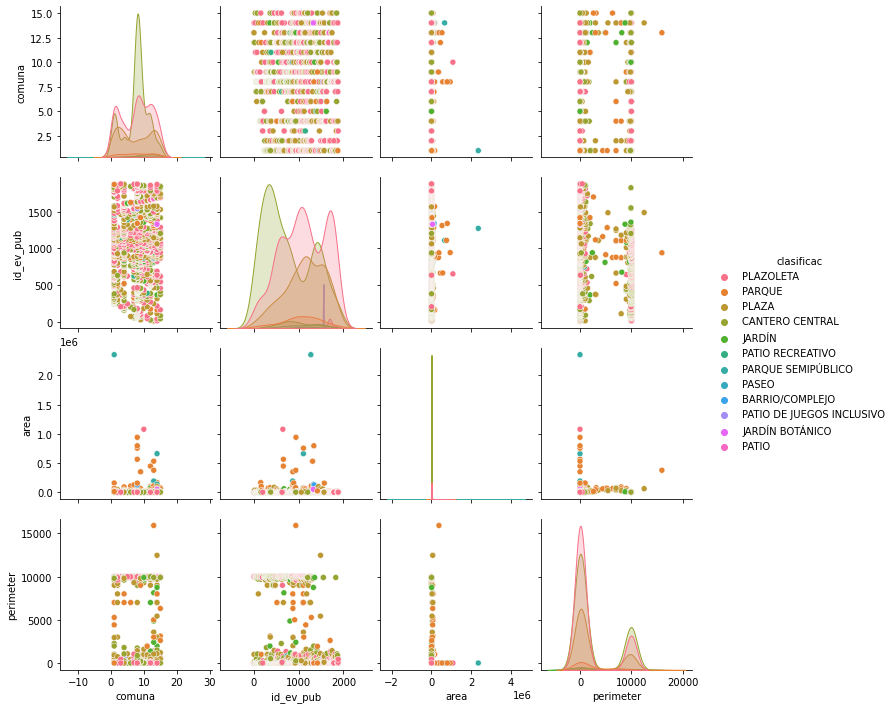

In [28]:
sns.pairplot(evt, hue = "clasificac")

plt.show()

Se hacen tablas y gráficos de torta para entender la cantidad de cada espacio y la distribucion de los m2 por clasificacion

In [29]:
evxcl = evt.clasificac.value_counts()
evxcl

PLAZOLETA                    644
CANTERO CENTRAL              643
PLAZA                        333
PARQUE                        56
JARDÍN                        27
PATIO RECREATIVO              17
PATIO                          5
PARQUE SEMIPÚBLICO             4
PATIO DE JUEGOS INCLUSIVO      3
PASEO                          2
JARDÍN BOTÁNICO                1
BARRIO/COMPLEJO                1
Name: clasificac, dtype: int64

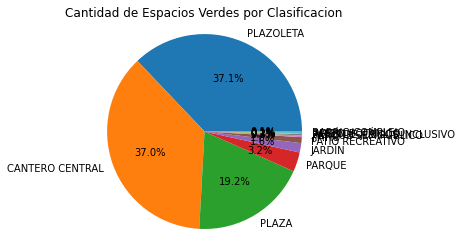

In [30]:
plt.pie(evxcl,labels = evxcl.index,autopct='%1.1f%%')
plt.title('Cantidad de Espacios Verdes por Clasificacion')
plt.axis('equal')
plt.show()

tambien se analiza la cantidad distribucion de los metros cuadrados por clasificacion

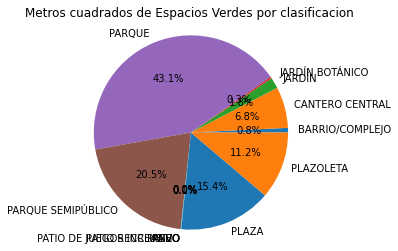

In [59]:
plt.pie(evtxt,labels = evtxt.index,autopct='%1.1f%%',)
plt.title('Metros cuadrados de Espacios Verdes por clasificacion')
plt.axis('equal')
plt.show()

Tanto la tabla como el grafico de tortas se realizan a nivel comuna

In [57]:
mevxc = evt.groupby(["comuna"]).area.sum()
mevxc

comuna
1.0     3253933.974
2.0      336135.186
3.0       45904.233
4.0      614307.522
5.0       20884.801
6.0      215695.441
7.0      342438.339
8.0     4175855.043
9.0      717913.744
10.0    1248083.086
11.0     118195.611
12.0    1014328.639
13.0    1746754.667
14.0    2220344.164
15.0     209046.017
Name: area, dtype: float64

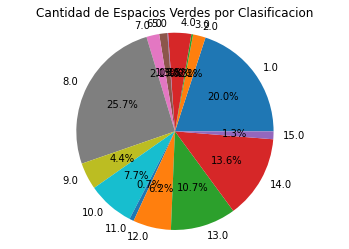

In [58]:
plt.pie(mevxc,labels = mevxc.index,autopct='%1.1f%%',)
plt.title('Cantidad de Espacios Verdes por Clasificacion')
plt.axis('equal')
plt.show()

In [ ]:
ordenevt = evt[evt.clasificac == "PARQUE" ].sort_values('area',ascending=False) 
ordenevt

##Geopandas

In [35]:
ev = ev.drop(["nombre_ev", "apadrinada", "observacio", "fuente_geo", "fuente_ins", "decreto", "fecha_decr", "ordenanza_", "fecha_orde", "boletin_of", "fecha_bole", "fech_padri", "vig_padri", "alc_conven", "nom_mapa", "DGEV_padri", "mant_2017", "tareas", "estado", "sup_total", "canil", "posta_aero", "etiqueta", "reja", "horario_invierno", "horario_verano", "obs_reja"], axis = 1)

In [36]:
evt.loc[1497, 'comuna'] = 10.0
evt.loc[1570, 'comuna'] = 8.0
evt.loc[1571, 'comuna'] = 8.0
evt.loc[1573, 'comuna'] = 8.0
evt.loc[1574, 'comuna'] = 8.0
evt.loc[1727, 'comuna'] = 1.0

###Se continuo realizando gráficos de mapas para entender la distribucion y clasificacion de los distintos espacios verdes en la ciudad de buenos aires

Grafico de espacios verdes en la ciudad segun su clasificacion

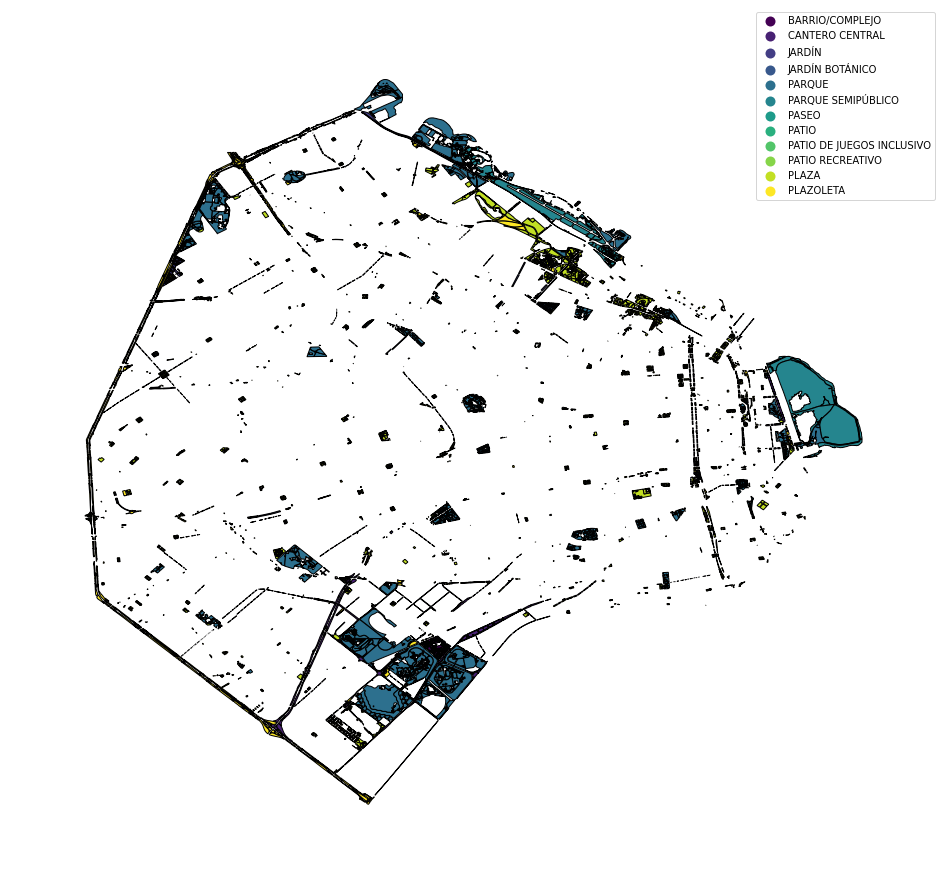

In [37]:
gplt.choropleth(ev, hue = ev['clasificac'], figsize = (20,16), legend = True)

Grafico de espacios verdes, con escala de colores segun su area

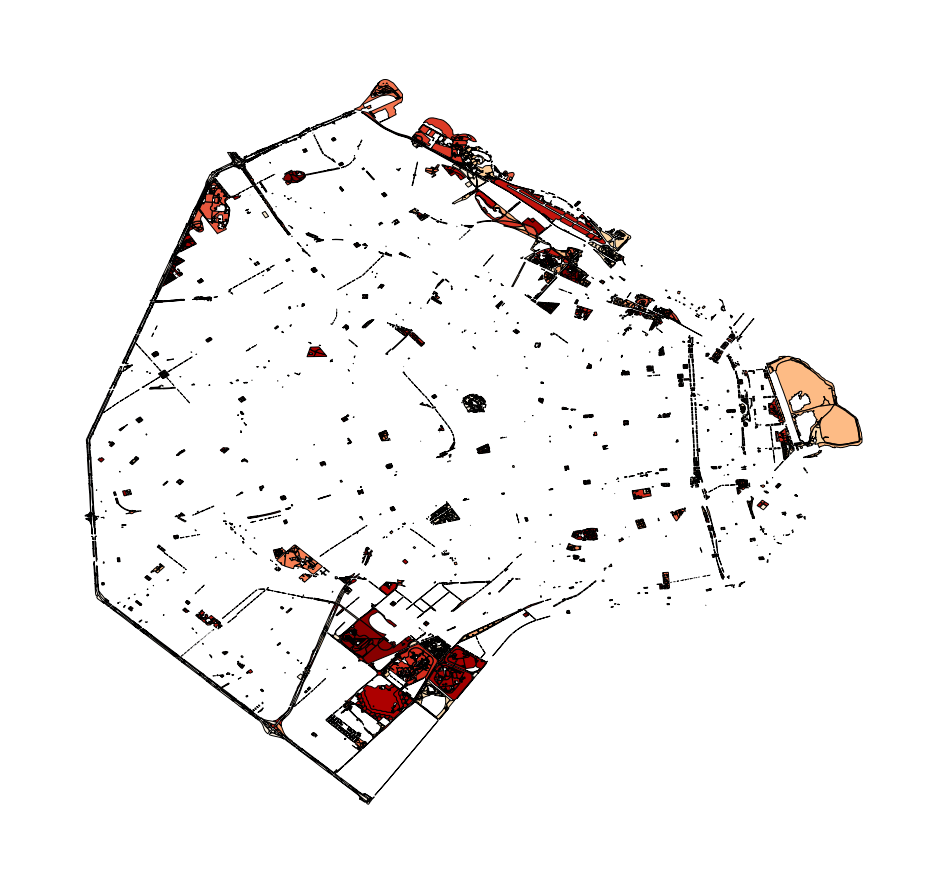

In [38]:
naranja = 'OrRd'
gplt.choropleth(ev, hue = ev['area'], cmap = naranja, figsize = (20,16))

Se probaron distintas formas para graficar lo mismo

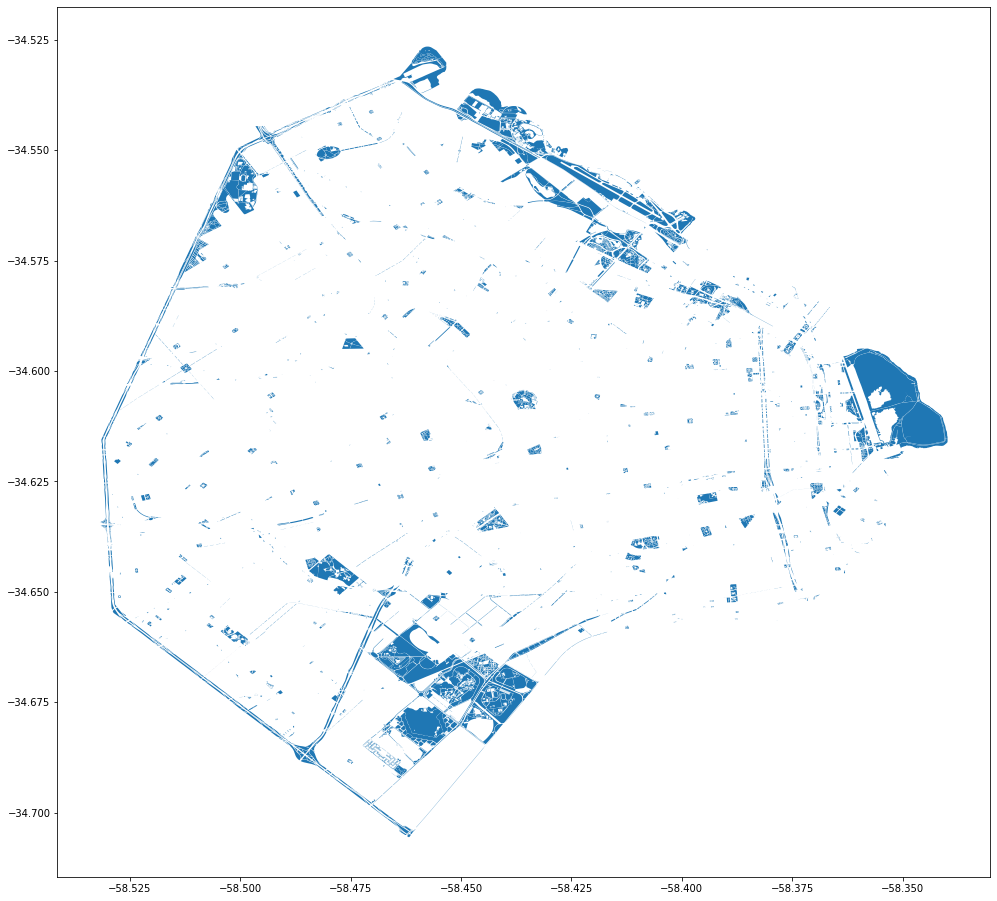

In [39]:
ev.plot(figsize = (20,16))

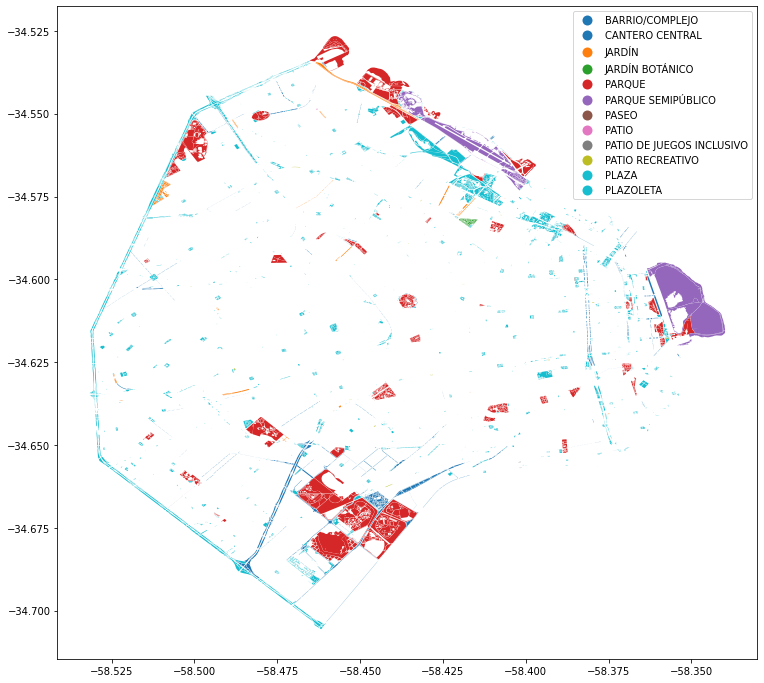

In [73]:
ev.plot(column='clasificac', legend=True, figsize= (16,12))

Se puede notar que los parques, plazoletas y plazas son los predominantes en la ciudad

tambien se separo por espacios con mayor area total para poder visualizarlo mejor, la leyenda indica area total

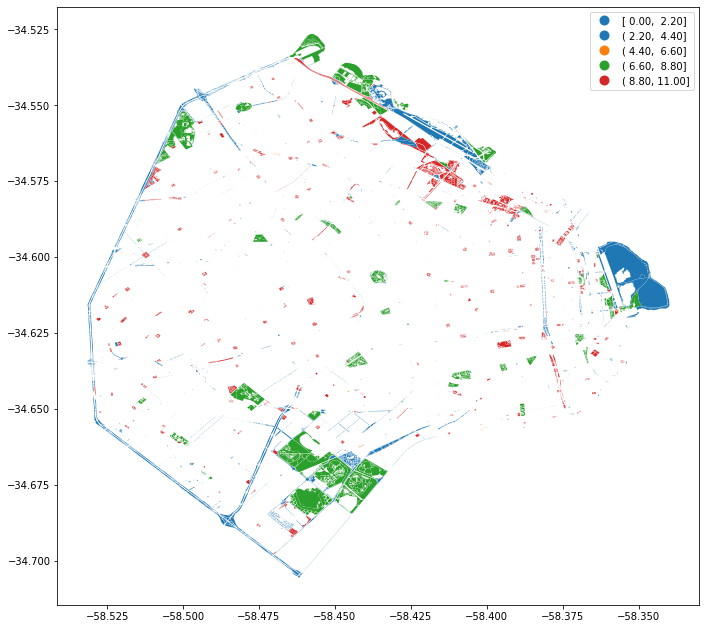

In [71]:
clasif = ev.dissolve(by='clasificac', aggfunc='sum')
clasif.plot(column = 'area', scheme='quantiles', legend=True, figsize = (15,11));

Luego se grafico solo un tipo de espacios verdes para entender la distribucion de cada uno

PLAZAS

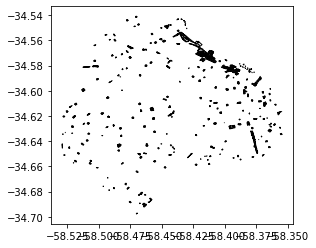

In [42]:
ax = ev[ev.clasificac == 'PLAZA'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

PLAZOLETAS

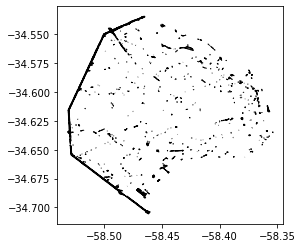

In [43]:
ax = ev[ev.clasificac == 'PLAZOLETA'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

PARQUES

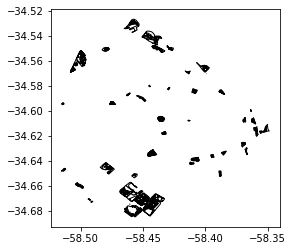

In [44]:
ax = ev[ev.clasificac == 'PARQUE'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

Se puede notar una gran cantidad de plazas y plazoletas bastante distribuidas a lo largo de la ciudad, sin embargo parece los parques parecen no estar del todo distribuidos, dejando zonas lejos de alguno

###Se procedio a analizar las comunas

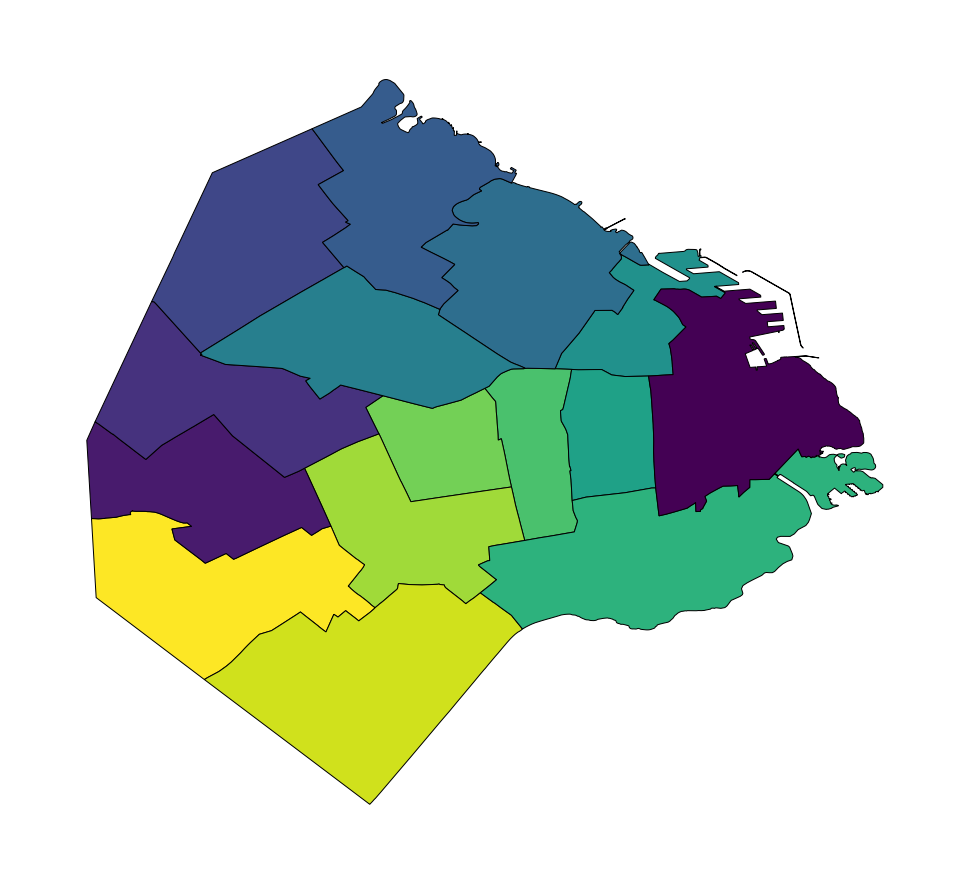

In [45]:
gplt.choropleth(com, hue = com['comuna'], figsize = (20,16))

##Concatenar datasets

Se unio la coluna de area de espacios verdes al dataset de comuna, recordar:
- "area" equivale a area de espacios verdes
- "areac" equivale al area total de la comuna

Se convierte el formato de la columna en string

In [46]:
mevxc = evt.groupby(["comuna"]).area.sum()
mevxc = mevxc.reset_index()
mevxc["comuna"] = mevxc["comuna"].astype("int")
mevxc["comuna"] = mevxc["comuna"].astype("str")
mevxc.head()


,comuna,area
0,1,3253933.974
1,2,336135.186
2,3,45904.233
3,4,614307.522
4,5,20884.801


Se concatenan los datos

In [47]:
evxcom = com.merge(mevxc, left_on="comuna", right_on="comuna", how='inner')
evxcom.head()

,wkt,barrios,perimetro,areac,comuna,id,objeto,geometry,area
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...",336135.186
1,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...",20884.801
2,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",215695.441
3,MULTIPOLYGON (((-58.4519952454565 -34.62974544...,FLORES - PARQUE CHACABUCO,17972.2578696,12422900.8308,7,4,LIMITE COMUNAL,"MULTIPOLYGON (((-58.45200 -34.62975, -58.45158...",342438.339
4,MULTIPOLYGON (((-58.5192540532325 -34.63301009...,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,16505305.7861,9,5,LIMITE COMUNAL,"MULTIPOLYGON (((-58.51925 -34.63301, -58.51908...",717913.744


Se genera el gráfico degradado segun cantidad de M2 de espacios verdes por comuna

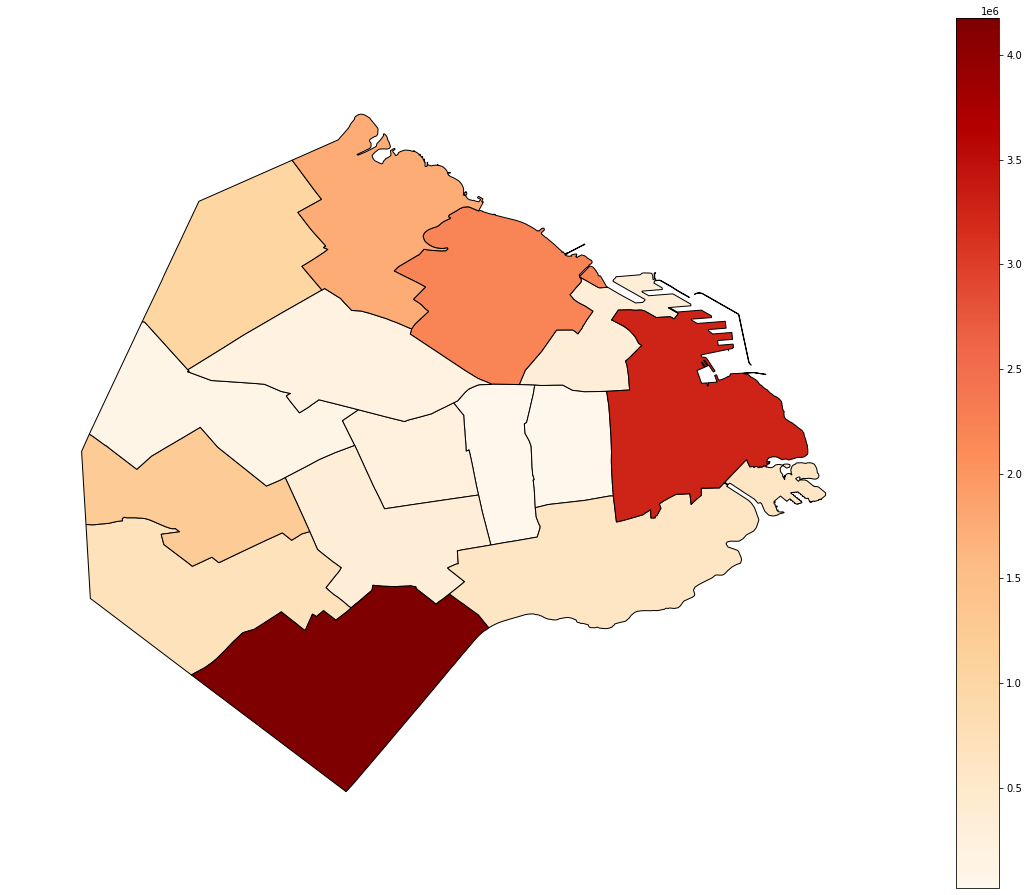

In [48]:
gplt.choropleth(evxcom, hue = evxcom['area'], cmap = 'OrRd', figsize = (20,16), legend = True)

##Conclusion parcial

Creeamos que si bien los datasets no contiene muchas features cuantificables, con los datos de areas de espacios verdes y formas geometricas tanto de espacios como comunas se pueden analisis utiles y especificos. Ademas se tiene pensado unirlo con mas datasets de densidad poblacional en cada comuna de la ciudad y con el financiamiento que cada una recibe, para hacer un analisis aun mas global.

#Bibliografía

Se utilizaron distintas paguinas para contender el manejo de datasets de caracter geografico, sumado a las librerias basicas



https://towardsdatascience.com/plotting-geographical-data-with-geopandas-338cc7e17e4e

https://geopandas.org/aggregation_with_dissolve.html

https://geopandas.org/aggregation_with_dissolve.html
https://www.datacamp.com/community/tutorials/geospatial-data-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1000073&gclid=Cj0KCQjwt4X8BRCPARIsABmcnOrWMSIaHzSoPH6EUAqAK2TPpsrLjKSR6wy41-uzoi5kBgnQXT49jBgaAuOgEALw_wcB



### MERGE

In [49]:
RPLZ1 = pd.read_csv("PLZ___www.google.com.ar_maps (1).csv")
RPLZ2 = pd.read_csv("PLZ___www.google.com.ar_maps (2).csv")
RPLZ3 = pd.read_csv("PLZ___www.google.com.ar_maps (3).csv")
RPLZ4 = pd.read_csv("PLZ___www.google.com.ar_maps (4).csv")
RPLZ5 = pd.read_csv("PLZ___www.google.com.ar_maps (5).csv")

RPLZ7 = pd.read_csv("PLZ___www.google.com.ar_maps (7).csv")
RPLZ8 = pd.read_csv("PLZ___www.google.com.ar_maps (8).csv")
RPLZ9 = pd.read_csv("PLZ___www.google.com.ar_maps (9).csv")
RPLZ10 = pd.read_csv("PLZ___www.google.com.ar_maps (10).csv")
RPLZ11 = pd.read_csv("PLZ___www.google.com.ar_maps (11).csv")
RPLZ12 = pd.read_csv("PLZ___www.google.com.ar_maps (12).csv")
RPLZ13 = pd.read_csv("PLZ___www.google.com.ar_maps (13).csv")
RPLZ14 = pd.read_csv("PLZ___www.google.com.ar_maps (14).csv")
RPLZ15 = pd.read_csv("PLZ___www.google.com.ar_maps (15).csv")
RPLZ16 = pd.read_csv("PLZ___www.google.com.ar_maps (16).csv")
rankplz = pd.concat([RPLZ1,RPLZ2,RPLZ3,RPLZ4,RPLZ5,RPLZ7,RPLZ8,RPLZ9,RPLZ10,RPLZ11,RPLZ12,RPLZ13,RPLZ14,RPLZ15,RPLZ16], ignore_index=True)
rankplz.head(2)

FileNotFoundError: ignored

In [ ]:
rankplz = rankplz.drop(["section-result-details", "section-result-location", "section-result-info","section-result-text-content", "section-result-text-content 2", "section-common-icon-image src",
                        "e0HygkTYhQy__attribute-content","e0HygkTYhQy__attribute", "e0HygkTYhQy__attribute-content 2", "e0HygkTYhQy__attribute-content 3","section-result-details-container",
                         "section-result-details-container 2","section-result-info 2"], axis = 1)
rankplz

In [ ]:
rankplz = rankplz.rename(columns = {'section-result-title': 'nombre2', "cards-rating-score":"ranking", 'section-result-num-ratings': 'reviews'}, inplace = False)
rankplz

In [ ]:
rankplz["ranking"] = rankplz["ranking"].astype("str")
rankplz["ranking"] = rankplz["ranking"].astype("float")
rankplz["reviews"] = rankplz["reviews"].astype("str")
rankplz["ranking"] = rankplz["ranking"].astype("float")
rankplz

In [ ]:
evrplz = ev.merge(rankplz, left_on="nombre", right_on="nombre2", how='left')
evrplz.head(3)

In [ ]:
evrplz.shape

In [ ]:
evrplz.info()

In [ ]:
evrplzu = evrplz[evrplz.clasificac == "PLAZOLETA"]
evrplzu.info()

In [ ]:
evrplzu.sort_values("area", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 
evrplzu.head(3)

In [ ]:
x = evrplzu["area"]
y = evrplzu["ranking"]

plt.plot(x, y, 'o', color='black')

In [ ]:
plt.scatter = (evrplzu["area"], evrplzu["ranking"])